In [1]:
import numpy as np
from autograd import numpy as anp
import  matplotlib.pyplot as plt
from python_files.maxent import MaxEnt
import python_files.densities as d
import python_files.figure_settings

In [2]:
u = 20
l = -20
n = 200

The resulting parameters:
  Lambda_1 = -1.664
  Lambda_2 = -0.082
  Lambda_3 = 0.971
  Lambda_4 = -0.312


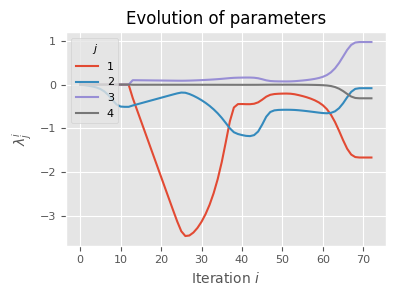

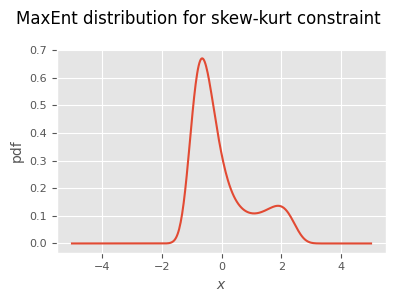

In [3]:
ob_skewkurt_ex = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(1,3),
                     f_vector=d.f_constraint_skewkurt,
                     warning_convergence=False,
                     k_max=80)
ob_skewkurt_ex.visualize_algorithm(title_save="figs/example_skew_kurt_algo.pdf",
                     figsize=(4,3))
a=5
N=400
xx = np.linspace(-1*a,a,N)
pdf1 = ob_skewkurt_ex.pdf(xx)

f, ax = plt.subplots(1,1,sharex=True, figsize=(4,3))
ax.plot(xx, pdf1, label="$(\\mu,\\sigma^2,\\gamma_1,\\gamma_2')=(0,1,1,3)$")
ax.set_ylabel("pdf")
ax.set_xlabel("$x$")
f.suptitle("MaxEnt distribution for skew-kurt constraint")
plt.tight_layout()
plt.savefig("figs/example_skew_kurt_sol.pdf")
plt.show()

The resulting parameters:
  Lambda_1 = -0.000
  Lambda_2 = -0.530
  Lambda_3 = 0.000
  Lambda_4 = 0.001


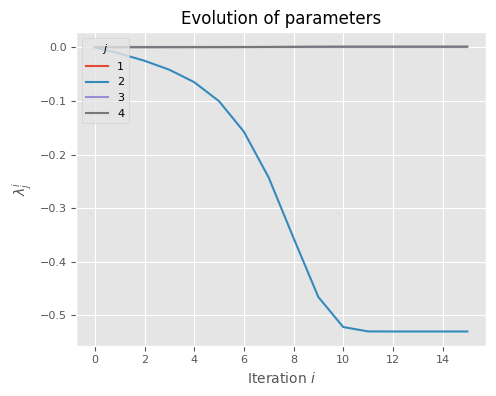

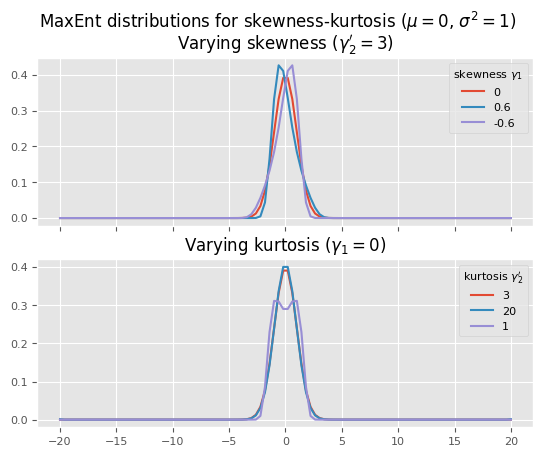

In [4]:
#Example 

ob_skewkurt_0_3 = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(0,3),
                     f_vector=d.f_constraint_skewkurt,
                     warning_convergence=False)
ob_skewkurt_p1_3 = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(.6,3),
                     f_vector=d.f_constraint_skewkurt,
                     warning_convergence=False)
ob_skewkurt_m1_3 = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(-.6,3),
                     f_vector=d.f_constraint_skewkurt,
                     warning_convergence=False)


kurt_high = 20
ob_skewkurt_0_5 = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(0,kurt_high),
                     f_vector=d.f_constraint_skewkurt,
                     warning_convergence=False)

ob_skewkurt_0_1 = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(0,2),
                     f_vector=d.f_constraint_skewkurt,
                     warning_convergence=False)

ob_skewkurt_0_5.visualize_algorithm()
a=20
N=100
xx = np.linspace(-1*a,a,N)
pdf1 = ob_skewkurt_0_3.pdf(xx)
pdf2 = ob_skewkurt_p1_3.pdf(xx)
pdf3 = ob_skewkurt_m1_3.pdf(xx)

pdf4 = ob_skewkurt_0_5.pdf(xx)
pdf5 = ob_skewkurt_0_1.pdf(xx)

f, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(xx, pdf1, label=0)
ax[0].plot(xx, pdf2, label=0.6)
ax[0].plot(xx, pdf3, label=-0.6)
ax[0].legend(title="skewness $\\gamma_1$")
ax[0].set_title("Varying skewness ($\\gamma_2'=3$)")

ax[1].plot(xx, pdf1, label=3)
ax[1].plot(xx, pdf4, label=kurt_high)
ax[1].plot(xx, pdf5, label=1)
ax[1].legend(title="kurtosis $\\gamma_2'$")
ax[1].set_title("Varying kurtosis ($\\gamma_1=0$)")
f.suptitle("MaxEnt distributions for skewness-kurtosis ($\\mu=0$, $\\sigma^2=1$)")
plt.show()

The resulting parameters:
  Lambda_1 = -4.279
  Lambda_2 = -3.647
  Lambda_3 = 3.518
  Lambda_4 = -0.628


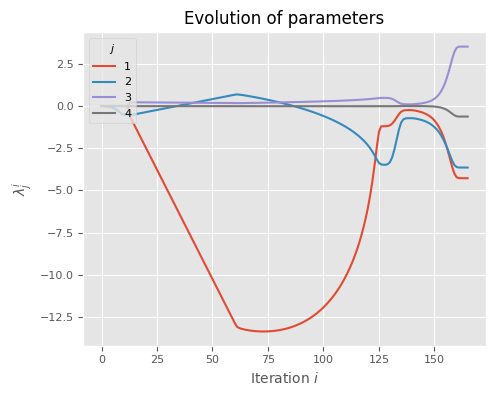

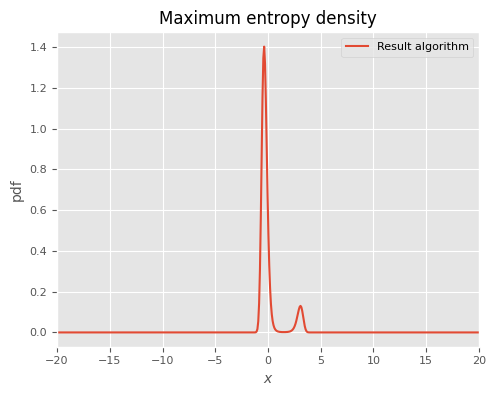

In [5]:
ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(2.5,8),
                     f_vector=d.f_constraint_skewkurt,
                     k_max=400)

ob_skewkurt.visualize_algorithm()
ob_skewkurt.visualize_solution()

The resulting parameters:
  Lambda_1 = -1.664
  Lambda_2 = -0.082
  Lambda_3 = 0.971
  Lambda_4 = -0.312


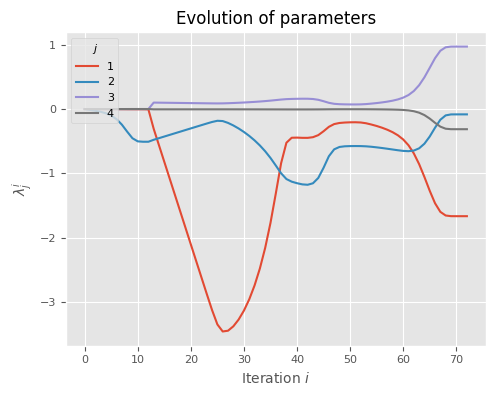

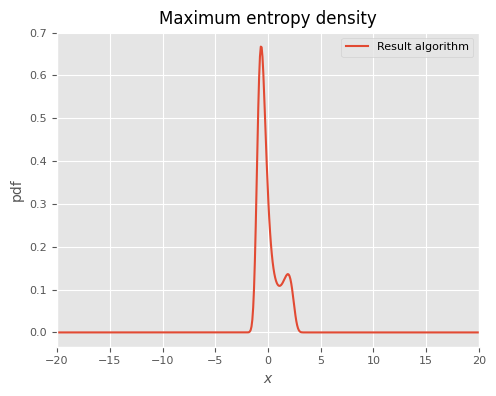

In [6]:
ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(1,3),
                     f_vector=d.f_constraint_skewkurt)
ob_skewkurt.visualize_algorithm()
ob_skewkurt.visualize_solution()

The resulting parameters:
  Lambda_1 = -2.318
  Lambda_2 = 1.120
  Lambda_3 = 1.675
  Lambda_4 = -0.852


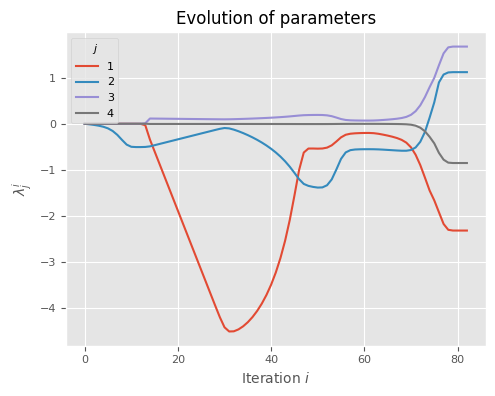

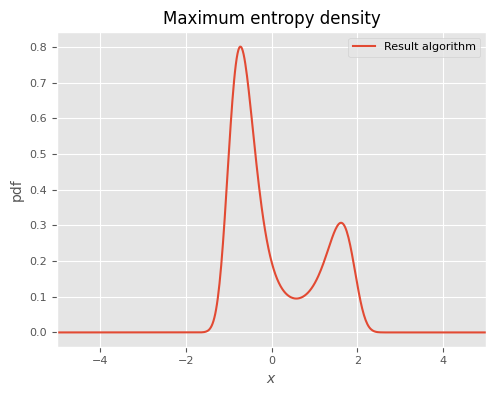

In [7]:
ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=100,
                     b_constraints=d.b_constraint_skewkurt(0.7, 2),
                     f_vector=d.f_constraint_skewkurt)

ob_skewkurt.visualize_algorithm()
ob_skewkurt.visualize_solution(xlim=(-5,5))

The resulting parameters:
  Lambda_1 = -2.339
  Lambda_2 = 1.434
  Lambda_3 = 1.636
  Lambda_4 = -0.916


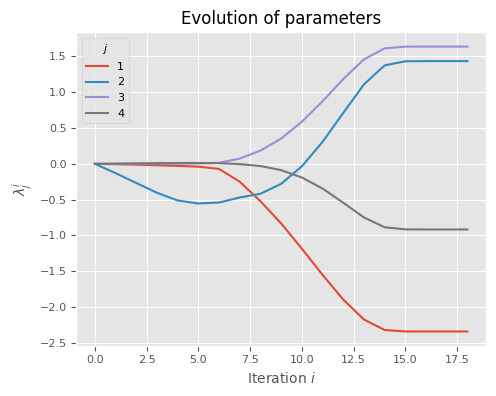

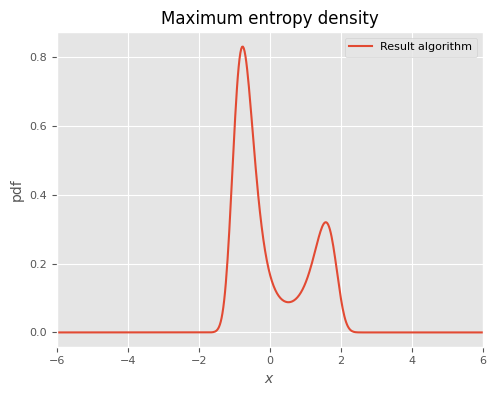

In [8]:

u = 6
l = -u
n = 40
skew = 0.7
kurt = 2

ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(skew,kurt),
                     f_vector=d.f_constraint_skewkurt)

ob_skewkurt.visualize_algorithm()
ob_skewkurt.visualize_solution()

In [ ]:
#Recreate Fig 1 from Rock&Jondeau
#Takes about 9 minutes
skews = np.arange(0, 4.1, .1)
kurts = np.arange(0, 15, .1)
convergence_indicator_mat = np.zeros((len(skews), len(kurts)))

Ss, Ks = np.meshgrid(skews,kurts)

n = 200
u = 6
l = -u

for i, skew in enumerate(skews):
    for j, kurt in enumerate(kurts):
        ob_skewkurt = MaxEnt(support=(l,u),
                    n_quadrature=n,
                    b_constraints=d.b_constraint_skewkurt(skew,kurt),
                    f_vector=d.f_constraint_skewkurt,
                    warning_convergence=False, 
                    message_norm=False)
        if(ob_skewkurt._converges):
            convergence_indicator_mat[i][j] = 1
        else:
            convergence_indicator_mat[i][j] = 0


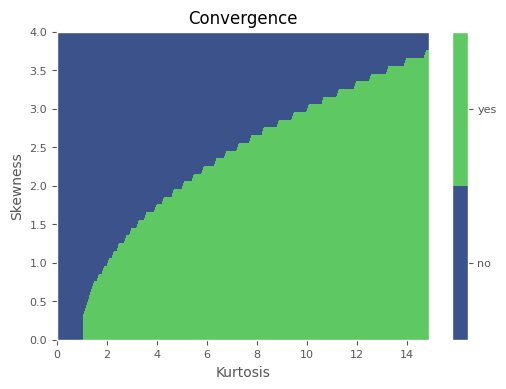

In [18]:
ylab="Skewness"
xlab="Kurtosis"
title=f"Convergence"
save_as=f"figs/conv_plot_contour.pdf"

fig, ax = plt.subplots(figsize=(6,4)) 

ax.set_title(title) 
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
cset1 = ax.contourf(kurts,skews,convergence_indicator_mat,
                    levels=1)


cbar = fig.colorbar(cset1, ax=ax,ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['no', 'yes'])

plt.savefig(save_as) 
plt.show() 